# Hands On Machine Learning

## Part4. Model Practice

In [17]:
import os

In [3]:
import numpy as np
X= 2*np.random.rand(100,1)
y=t(X_b) 4 + 3*X + np.random.randn(100,1)

In [4]:
X_b = np.c_[np.ones((100,1)),X] #x0=1
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best #expected theta0=4, theta1=3

array([[ 4.12205373],
       [ 2.98014638]])

In [20]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"

In [21]:
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

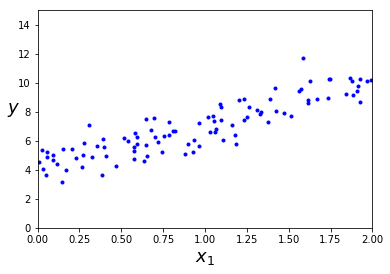

In [23]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])

plt.show()

In [25]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[  4.12205373],
       [ 10.08234648]])

In [11]:
from matplotlib import pyplot as plt

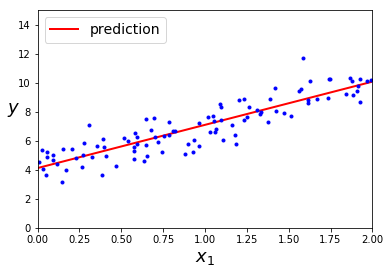

In [28]:
%matplotlib inline
plt.plot(X_new, y_predict, "r-", linewidth=2, label="prediction")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

In [29]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 4.12205373]), array([[ 2.98014638]]))

## Gradient Descent
* cost function의 최소화, 반복해서 parameter 조정해나가는 방식
* local minimum과 golobal minimum 주의
* 빠르게 최솟값을 구하기 위해서 feature scaling을 해주어야 한다, sklearn.StandardScaler
* 우리는 Parameter space에서 최적의 parameter 조합을 찾는다. convex function이면 최적값은 그릇의 맨 아래에 있다

### Batch Gradient Descent
* Gradient: parameter가 변화할때 비용함수가 얼마나 바뀌는지, 발밑에 느껴지는 산의 기울기
* 매 스텝에서 훈련데이터 전체를 사용하기 때문에 큰 훈련 세트에서는 매우 느리다.
* GD는 featur수에 민감하지 않아, 수많은 feaure들이 있을 때 정규방정식 방법보다 효과적이다.

In [30]:
eta = 0.1
n_iteration = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iteration):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients
    
theta

array([[ 4.12205373],
       [ 2.98014638]])

* 적절한 learing rate를 찾으려면 Grid Search를 통해 찾는다.(반복 횟수 제한)
* 반복 횟수를 크게 지정하고 gradient 벡터가 아주 작아지면(0에가까워지면), 벡터의 norm이 허용오차보다 작아지면 최솟값에 도달한 것이라 판단한다.

### Stochastic Gradient Descent(SGD)
* 기존 GD의 문제점은 Gradient를 계산할때 전체 배치를 사용한다는 점이다, train set이 커지면 속도가 굉장히 느려지는 단점이 있다.
* SGD는 매 스텝에서 딱 한개의 샘플을 무작위로 선택하고 하나의 샘플에 대한 gradient를 계산한다.
* 매우 빠르고 큰 훈련 데이터도 처리 가능하다.
* 하지만 확률적으로 접근 하기 때문에 불안정하다. cost function이 위 아래로 요동치면서 최솟값에 접근하고, 도출되는 값이 최솟값에 인접한 값이다.
* Cost function이 매우 불규칙할 경우 local minimum을 넘어 global minimum을 구할 수도 있다.
* Learning Rate를 점진적으로 감소시킨다. 시작할때는 eta 값을 크게 주고(local minimum에 빠지는 걸 방지), 점차 작게 줄여서 global minimum에 도달하게 한다.
* Learning Scheduling

In [36]:
random_index=np.random.randint(m)
xi = X_b[random_index:random_index+1]

In [44]:
xi

array([[ 1.        ,  0.78249888]])

In [31]:
n_epochs = 50
t0, t1 = 5, 50 #learning scheduling params

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1) #random initializing

##Question1.
for epoch in range(n_epochs):
    for i in range(m): #m=number of samples in train data, 100
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta*gradients

In [32]:
theta 

array([[ 4.0461508 ],
       [ 2.98823011]])

* SGDClassifier의 SGDRegressor가 사용하는, 샘플 여러 번 선택되는 것을 방지하는 방법 (훈련 세트를 섞고 차례대로 하나씩 선택하고 다음 에포크에서 다시 섞는다)   
방법은 늦게 수렴된다.

In [45]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [46]:
sgd_reg.intercept_, sgd_reg.coef_

(array([ 4.10464054]), array([ 2.96493355]))

## mini-batch Gradient Descent
* 임의의 작은 샘플 세트에 대해 gradient를 계산한다.
* GPU를 이용해 얻는 성능 향상이 주요 장점이다.
* 어느정도 미니배치를 크게하면 parameter space에서 SGD보다 덜 불규칙적으로 움직이게 된다.

## Polynimial Regression(다항 회귀)
* 비선형 데이터를 학습하는데 선형 모델을 사용할 수 있다.

In [48]:
m = 100
X = 6* np.random.rand(m, 1) -3
y = 0.5* X**2 +X +2 +np.random.randn(m,1)

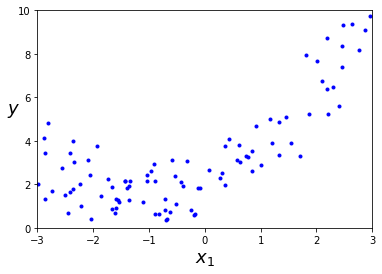

In [49]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

plt.show()

In [50]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias = False)

In [51]:
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.71757476])

In [52]:
X_poly[0]

array([-0.71757476,  0.51491353])

In [53]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_ #(x1, x1**2)

(array([ 2.05607583]), array([[ 1.11607544,  0.49286236]]))

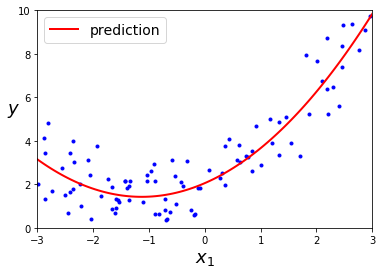

In [55]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="prediction")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])

plt.show()

In [57]:
#특성의 차수 확인
poly_features.get_feature_names()

['x0', 'x0^2']

## Learning Curve
* Overfitting, Underfitting 여부를 확인하는 방법:   
        1.Cross Validation을 통해 일반화 성능을 추정한다. 
        2.Learning Curve를 확인한다.


In [66]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_cuves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict[:m]))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label= 'train-set')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='validation-set')
    plt.legend(loc="upper right", fontsize=14)   # 책에는 빠짐
    plt.xlabel("size of train set", fontsize=14)       # 책에는 빠짐
    plt.ylabel("RMSE", fontsize=14)              # 책에는 빠짐


In [77]:
np.random.seed(42)

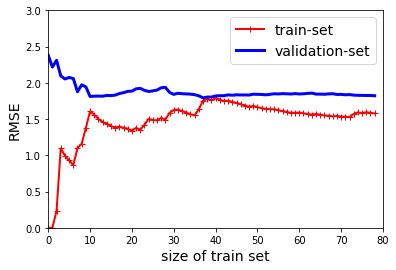

In [85]:
#underfitting
lin_reg = LinearRegression()
plt.axis([0, 80, 0, 3])           # 책에는 빠짐
plot_learning_cuves(lin_reg, X, y)

__Train set__은 0에서부터 시작, 훈련세트에 하나, 두개의 샘플이 있을때는 모델이 잘 작동함. 샘플이 추가되면서 노이즈 발생, 모델이 훈련데이터를 완벽히
학습하는 것이 불가능해짐(비선형이기 때문), 곡선이 평평해질 때까지 오차가 계속 상승, 훈련 샘플이 추가되어도 오차가 별 차이가 없음.

__Validation set__은 적은 수의 훈련 샘플로 훈련할 때는 일반화가 잘 되지 않아 검증 오차가 매우 큼, 샘플이 추가되면서 학습이 되고 검증 오차가 감소함. 
선형 회귀의 직선은 데이터를 잘 모델링 할 수 없기 때문에 오차의 감소가 완만해져 훈련세트의 그래프와 가까워짐

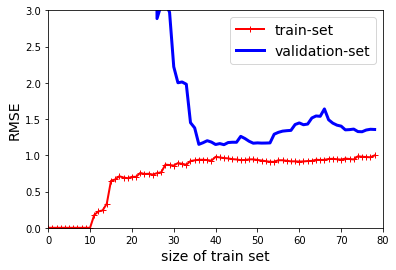

In [86]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_cuves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # 책에는 빠짐

plt.show()                        # 책에는 빠짐

* 훈련 데이터의 오차가 선형회귀 모델보다 훨씬 낮다
* 두 곡선 사이에 공간이 있다. 즉, 훈련데이터에서의 모델 성능이 검증 데이터 보다 훨씬 낫다는 뜻이고 이는 Overfitting된 모델의 특징이다.  
  더 큰 훈련 세트를 사용하면 곡선이 가까워 진다. #Question2

## Regularization

### Ridge Regression

In [91]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[ 4.99723592]])

In [95]:
sgd_reg = SGDRegressor(max_iter=5, penalty="l2", random_state=42) #penalty=12 == Ridge
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])


array([ 3.8342796])

### Lasso(Least Absolute Shrinkage and Selection Operator

* 라쏘 회귀는 덜 중요한 특성의 가중치를 완전히 제거하려고 한다.
* 자동으로 feature selection을 하고 Sparse Model을 만든다

In [97]:
from sklearn.preprocessing import StandardScaler

In [100]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

# 편향은 무시
t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[-1, 1], [-0.3, -1], [1, 0.1]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

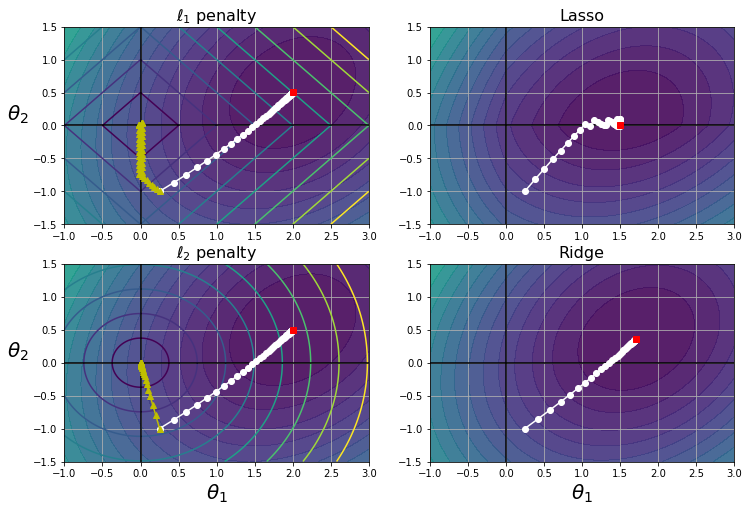

In [101]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.1, n_iterations = 50):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + 2 * l2 * theta

        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

plt.figure(figsize=(12, 8))
for i, N, l1, l2, title in ((0, N1, 0.5, 0, "Lasso"), (1, N2, 0,  0.1, "Ridge")):
    JR = J + l1 * N1 + l2 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(t_init, Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    plt.subplot(221 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, J, levels=levelsJ, alpha=0.9)
    plt.contour(t1, t2, N, levels=levelsN)
    plt.plot(path_J[:, 0], path_J[:, 1], "w-o")
    plt.plot(path_N[:, 0], path_N[:, 1], "y-^")
    plt.plot(t1_min, t2_min, "rs")
    plt.title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])
    plt.ylabel(r"$\theta_2$", fontsize=20, rotation=0, labelpad=15)
    if i == 1: plt.xlabel(r"$\theta_1$", fontsize=20)

    plt.subplot(222 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    plt.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    plt.plot(t1r_min, t2r_min, "rs")
    plt.title(title, fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])
    if i == 1: plt.xlabel(r"$\theta_1$", fontsize=20)


plt.show()

라쏘 비용 함수에서 경사 하강법의 경로가 지그재그로 튀는 경향이 보인다. 이는 $\theta_2$=0에서 기울기가 바뀌기 때문이다. 학습률을 점진적으로 줄여나가야 한다.

라쏘는 $\theta_1$에서 미분가능하지 않다, L1노름이 절댓값 함수를 사용하기 때문이다.

In [103]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1, random_state=42)
lasso_reg.fit(X,y)
lasso_reg.predict(([[1.5]]))

array([ 4.77621741])

### Elastic Net
* Lasso와 Ridge를 섞은 모델
* r=0: Ridge,  r=1: Lasso

#### 언제 쓰이는가?
* 평범한 선형회귀는 피한다.
* 실제 쓰이는 feature가 몇 개뿐이라고 생각되면 라쏘나 엘라스틱넷이 낫다.(불필요한 특성의 가중치가 0)
* feature 수가 훈련 샘플 수보다 많거나 특성 몇개가 강하게 연관되어 있을 때는 엘라스틱넷을 사용한다.

Early Stopping
* Overfitting되기 전에 끊는다.

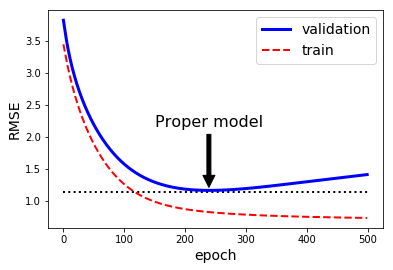

In [98]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Proper model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="validation")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="train")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

plt.show()

In [104]:
from sklearn.base import clone
sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None,
                       learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # 이어서 학습합니다
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

## Logistic Regression
* Binary Classifier

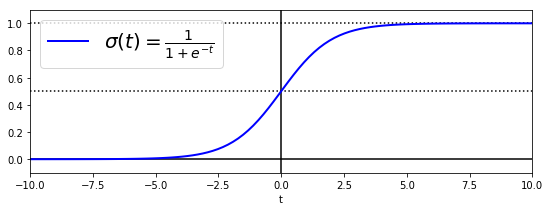

In [105]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])

plt.show()


## 결정 경계

In [106]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [107]:
X = iris["data"][:, 3:]  # 꽃잎 넓이
y = (iris["target"] == 2).astype(np.int)  # Iris-Virginica이면 1 아니면 0

In [108]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

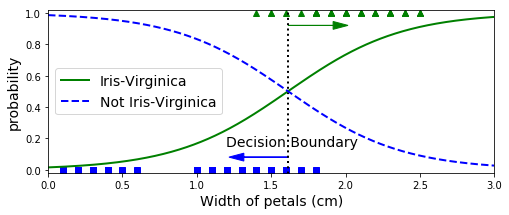

In [113]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision Boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Width of petals (cm)", fontsize=14)
plt.ylabel("probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])

plt.show()

In [114]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

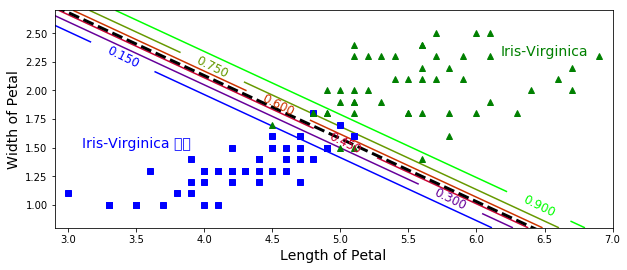

In [116]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Iris-Virginica 아님", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Length of Petal", fontsize=14)
plt.ylabel("Width of Petal", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])

plt.show()

## Softmax Regression
* 여러개의 이진 분류기를 훈련시켜 연결하지 않고, 직접 다중 클래스를 지원함.(Multinomial Logistic Regression)
* 출력은 하나의 클래스만 예측함, 다중 클래스일 뿐, 다중 출력은 아니다.


In [117]:
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 넓이
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

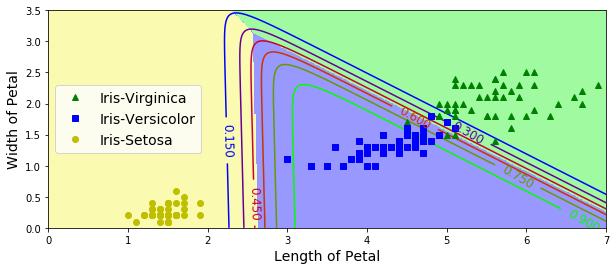

In [118]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Length of Petal", fontsize=14)
plt.ylabel("Width of Petal", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])

plt.show()

In [119]:
softmax_reg.predict([[5, 2]])

array([2])

In [120]:
softmax_reg.predict_proba([[5, 2]])

array([[  6.33134076e-07,   5.75276067e-02,   9.42471760e-01]])